In [2]:
# ML PIPELINE PROCESS

# step 0: import the data
import pandas as pd
df_bnb = pd.read_csv(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\univariate_automation\listings.csv')

# step 1: calculate univariate analysis
import sys
sys.path.append(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\myfunctions')
import myfunctions as my
# my.univariate_stats(df_bnb, 2)

# step 2: clean the data
df_bnb_clean = my.basic_wrangling(df_bnb)
df_bnb_clean = my.parse_dates(df_bnb_clean, features=['last_review'])
df_bnb_clean.head()

All values unique; id dropped
All values missing; neighbourhood_group dropped


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,last_review_weekday,last_review_days_since
0,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.13,1,0,2019.0,11.0,21.0,Thursday,1902.0
1,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,80,1,306,2019-12-05,2.57,2,198,2019.0,12.0,5.0,Thursday,1888.0
2,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.13,2,71,2019.0,5.0,11.0,Saturday,2096.0
3,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.38673,4.89208,Private room,155,2,206,2019-11-11,2.14,1,251,2019.0,11.0,11.0,Monday,1912.0
4,Comfortable double room,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,318,2019-11-23,2.81,3,134,2019.0,11.0,23.0,Saturday,1900.0


Day 2:

In [14]:
# def bin_categories(df, features=[], cutoff=0.05, replace_with="Other", messages=True):
#     import pandas as pd

#     if len(features) == 0:
#         features = df.columns

#     for feat in features:
#         if feat in df.columns:
#             # get a list of group values and their percent of rows
#             if not pd.api.types.is_numeric_dtype(df[feat]):
#                 group_count = df[feat].value_counts()
#                 other_list = group_count[group_count / df.shape[0] < cutoff].index
#                 df.loc[df[feat].isin(other_list), feat] = replace_with
#             # filter the list down to those that represent less than 5% of the rows
#             # update the group name to "Other" for all of those filtered values

#         else:
#             print(f"{feat} not found in dataframe")    
#     return df

All values unique; id dropped
All values missing; neighbourhood_group dropped
2404 rows were dropped first due to missing data
Starting skew:	5.00873
Final skew:	0.00494 based on raising to 19.32


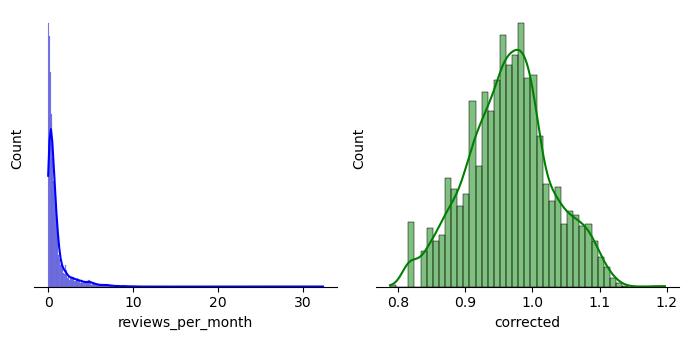

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,last_review_weekday,last_review_days_since,reviews_per_month_1/19.32
0,Other,52.36575,4.94142,Private room,59,3,277,2.13,1,0,2019.0,11.0,21.0,Thursday,1902.0,1.039913
1,Centrum-Oost,52.36509,4.89354,Private room,80,1,306,2.57,2,198,2019.0,12.0,5.0,Thursday,1888.0,1.050070
2,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,0.13,2,71,2019.0,5.0,11.0,Saturday,2096.0,0.899783
3,Centrum-West,52.38673,4.89208,Private room,155,2,206,2.14,1,251,2019.0,11.0,11.0,Monday,1912.0,1.040165
4,Centrum-West,52.36719,4.89092,Private room,75,2,318,2.81,3,134,2019.0,11.0,23.0,Saturday,1900.0,1.054933


In [3]:
import pandas as pd
df_bnb = pd.read_csv(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\univariate_automation\listings.csv')

# step 1: calculate univariate analysis
import sys
sys.path.append(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\myfunctions')
import myfunctions as my

df_bnb.drop(columns=['name', 'host_name', 'host_id'], inplace=True)

df_bnb = my.basic_wrangling(df_bnb.copy())
df_bnb = my.parse_dates(df_bnb.copy(), features=['last_review'])
df_bnb = my.bin_categories(df_bnb)

my.skew_correct(df_bnb, 'reviews_per_month')
df_bnb.head()
